In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Zadanie 1: False Discovery
W danych symulujących 1000 szeregów czasowych poniżej około 4.5% trendów, wykrywanych przez test nachylenia regresji, raportowanych jest błędnie (przypadkowe p-value). Użyj korekty dla False Discovery Rate tak by wykryć trendy z błędem false-positive około 1% lub mniejszym, zademonstruj to w macierzy (confusion matrix). Skomentuj wyniki, czy redukcja “false positive” ma efekty uboczne?

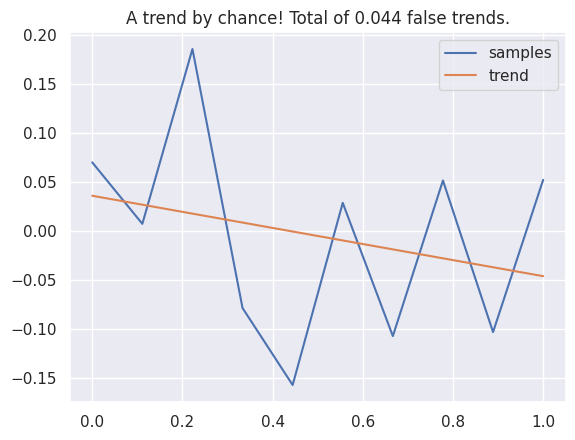

In [2]:
R = 1000
N = 10


Y = stats.norm(0,0.1).rvs(size=(R,N))
Y[:100] = np.linspace(0,1,N) + stats.norm(0,0.2).rvs(size=(100,N)) # 10% of trends are real
x = np.linspace(0,1,10)
pvals = np.array([stats.linregress(x,y).pvalue for y in Y])
extreme_id = pvals[100:].argmin()
plt.plot(x,Y[extreme_id],label='samples')
res = stats.linregress(x,Y[extreme_id])
plt.plot(x,x*res.slope+res.intercept,label='trend')
plt.title(f"A trend by chance! Total of {(pvals<0.05).mean()-0.1:.3f} false trends.")
plt.legend()
plt.show()

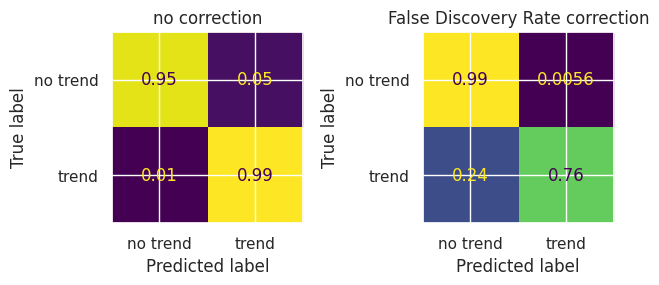

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt


fig,axs = plt.subplots(1,2)

trend_predicted = pvals < 0.05
trend_true = np.arange(len(pvals)) < 100


ax = axs[0]
cm = confusion_matrix(trend_true, trend_predicted, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=['no trend','trend']).plot(ax=axs[0],colorbar=False)
ax.set_title("no correction")


from statsmodels.stats.multitest import multipletests


pvals_corr = multipletests(pvals, method = 'fdr_bh')[1]


trend_predicted = pvals_corr < 0.05
trend_true = np.arange(len(pvals)) < 100


ax = axs[1]
cm = confusion_matrix(trend_true, trend_predicted, normalize='true')
ConfusionMatrixDisplay(cm, display_labels=['no trend','trend']).plot(ax=ax,colorbar=False)
ax.set_title("False Discovery Rate correction")


plt.tight_layout()
plt.show()

Tak, redukcja "false positive" ma efekty uboczne. Model staje się mniej "wrażliwy", co powoduje, że odrzuca przypadki, gdy trend był obecny, czyli jest zwiększona szansa na popełnienie błędu II rodzaju.

# Zadanie 4: Wizualizacja struktur.
Zademonstruj jak użyć metody UMAP do pokazania struktury klastrów w wybranych przez siebie danych (łatwo znaleźć na OpenML). Przykład:


In [4]:
%pip install openml --quiet
%pip install umap-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.0 MB/s eta 0:00:00


/opt/anaconda3/envs/Introduction-to-Machine-Learning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/Introduction-to-Machine-Learning/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


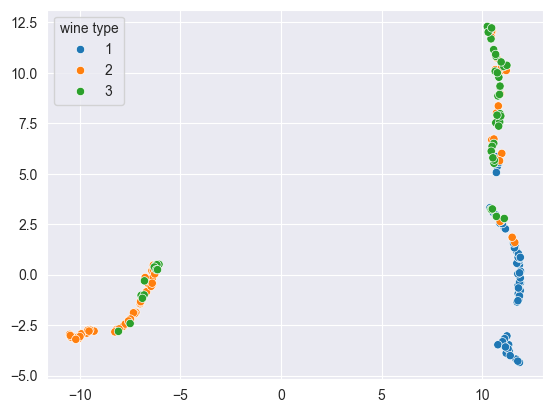

In [1]:
import sklearn
import umap
import matplotlib.pyplot as plt
import openml
import seaborn as sns


# get dataset from OpenML
dataset = openml.datasets.get_dataset('WineDataset') # find an interesting dataset
X, y, _, _ = dataset.get_data(target="Wine") # figure out the right target


# use UMAP for powerful dimension-reduction and visualization!
X_embed = umap.UMAP(random_state=42).fit_transform(X)


fig = sns.scatterplot(x=X_embed[:, 0], y=X_embed[:, 1], hue=y.astype(str)) # each class gets its own color
fig.legend(title="wine type")
plt.show()
# check for cool patterns!


/opt/anaconda3/envs/Introduction-to-Machine-Learning/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


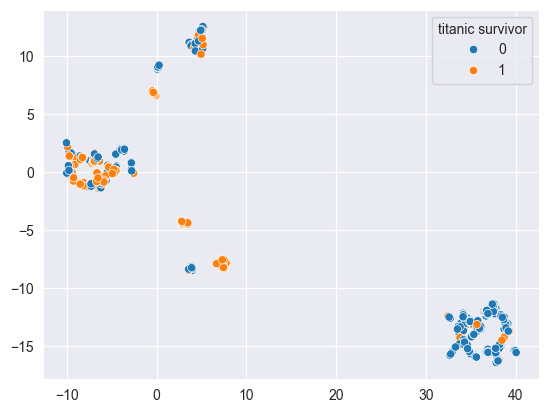

In [2]:
import sklearn
import umap
import matplotlib.pyplot as plt
import openml
import seaborn as sns


dataset = openml.datasets.get_dataset('titanic_1')
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

X_embed = umap.UMAP(random_state=42).fit_transform(X)


fig = sns.scatterplot(x=X_embed[:, 0], y=X_embed[:, 1], hue=y.astype(str))
fig.legend(title="titanic survivor")
plt.show()


# Zadanie 5: Hyperparameter Tunning
Exercise 15 z Notebooka 4


In [7]:
dataset = sklearn.datasets.load_wine()
xtrain, xtest, ytrain, ytest = train_test_split(dataset.data, dataset.target, test_size=0.2, stratify=dataset.target)
xptrain, xval, yptrain, yval = train_test_split(xtrain, ytrain, test_size=0.25, stratify=ytrain)

Optimal k: 25


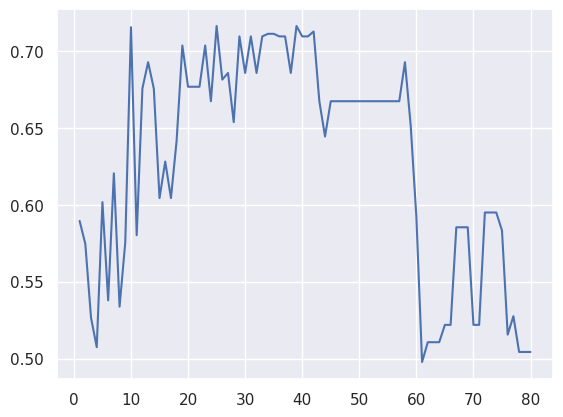

In [8]:
f = np.zeros(80)
for k in range(1,81):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(xptrain, yptrain)
  predval = neigh.predict(xval)
  f[k-1] = f1_score(yval, predval, average = 'macro')

sns.lineplot(x=range(1, 81), y=f)

best_k = np.argmax(f) + 1
print("Optimal k:", best_k)